1. Input Data Setup:
x_in and y_in: Arrays representing the input data for logistic regression. x_in contains feature values, while y_in contains corresponding labels (0 or 1).
y1_in: Complement of y_in (i.e., if y_in is 0, y1_in is 1, and vice versa).
nx: Size of the input array x_in.
2. Objective Function Definition:
The objective function is the negative log-likelihood for logistic regression:

In [22]:
import numpy as np
import matplotlib.pyplot as plt

x_in = np.array([2.5,5.5,7.5,8,11,15.5,17,19,23.75,24])
y_in = np.array([0,0,0,0,0,1,1,1,1,1],dtype=np.int8)
y1_in=1-y_in
nx=x_in.size

In [23]:
def objective_function(w):
    z = w[0] + w[1] * x_in
    z1 = np.log(1 + np.exp(-z))
    z2 = np.log(1 + np.exp(z))
    return np.dot(y_in, z1) + np.dot(y1_in, z2)

(i) Purpose: It calculates the cost that needs to be minimized. This is the sum of the losses for the positive and negative classes.

(ii) z: The linear combination of the input features and weights (w[0] is the intercept and w[1] is the slope).

(iii) z1: Logistic loss for y_in = 1.

(iv) z2: Logistic loss for y_in = 0.

(v) The total loss is the sum of the losses for both classes.

3. Gradient Function Definition:

In [24]:
def gradient_function(w):
    hi = 1 / (1 + np.exp(-w[0] - w[1] * x_in))  # Sigmoid function
    yh = 1. * hi - 1. * y_in
    return np.array([np.sum(yh), np.dot(yh, x_in)])

(i) Purpose: It computes the gradient of the objective function with respect to the weights w. This gradient will guide the updates in the direction of minimizing the objective function.

(ii) hi: Represents the predicted probabilities (sigmoid function).

(iii) yh: Difference between the predicted probability hi and the actual values y_in.

4. Line Search Algorithm:

In [25]:
def line_search(objective_function, gradient, x):
    beta = .1
    stepsize = 1
    trial = 100
    tau = .5
    for i in range(trial):
        fx1 = objective_function(x)
        fx2 = objective_function(x - stepsize * gradient)
        c = -beta * stepsize * np.dot(gradient, gradient)
        if fx2 - fx1 <= c:
            break
        else:
            stepsize = tau * stepsize
    return stepsize

(i) Purpose: To dynamically adjust the step size when updating the weights w.

(ii) stepsize: Initial step size for gradient descent.

(iii) The algorithm iteratively reduces the step size (stepsize = tau * stepsize) until a sufficient decrease in the objective function is observed (fx2 - fx1 <= c).

(iv) This ensures a more efficient convergence of the gradient descent.

5. Main Gradient Descent Loop:

In [26]:
maxit = 1000000
epsilon = 1.e-3 
w = np.array([-2, 3])  # Initial weight vector
for i in range(maxit):
    gradient = gradient_function(w)
    b = np.linalg.norm(gradient)
    if b < epsilon:
        break
    stepsize = line_search(objective_function, gradient, w)
    w = w - stepsize * gradient
    #print(i, b)

C:\Users\Harsh\AppData\Local\Temp\ipykernel_18428\3980914087.py:3: RuntimeWarning: overflow encountered in exp
  z1 = np.log(1 + np.exp(-z))


(i) Purpose: To iteratively update the weight vector w using gradient descent until convergence.

(ii) The loop runs for a maximum of maxit iterations, but it will terminate earlier if the norm of the gradient (b) is smaller than a threshold (epsilon), indicating that the algorithm has converged.

(iii) At each iteration, the gradient_function is used to compute the gradient, and line_search determines the appropriate step size for updating the weights.

6. Print Results:

In [27]:
minimum_value = objective_function(w)
print("Minimum value:", minimum_value)
print("Minimum location:", w)
print("iteration:", i)

Minimum value: 0.005878512558580003
Minimum location: [-34.28669694   2.60140076]
iteration: 11356


(i) The minimum value of the objective function and the final values of the weights (w) are printed, as well as the number of iterations the algorithm took to converge.

7. Plotting the Decision Boundary:

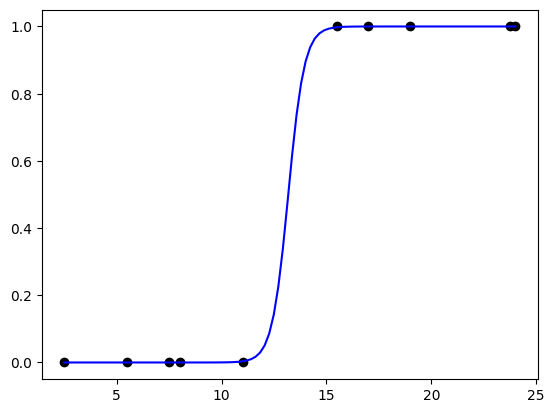

In [28]:
x_plot = np.linspace(2.5, 24, 100)
z = np.zeros(x_plot.size)
p = np.zeros(x_plot.size)
z[:] = -w[0] - w[1] * x_plot[:]
p[:] = 1 / (1 + np.exp(z[:]))  # Predicted probabilities (sigmoid)
plt.scatter(x_in, y_in, color='black')  # Input data points
plt.plot(x_plot, p, color='blue')  # Logistic regression curve
plt.savefig('log_regression3.tif', dpi=1200)
plt.show()

(i) Purpose: This section generates and plots the logistic regression curve.

(ii) x_plot: A range of values for plotting the decision boundary.

(iii) p: Predicted probabilities using the final weights (w) on the range of values x_plot.

(iv) The plot includes the original input data points (x_in, y_in) as black dots, and the logistic regression decision boundary as a blue line.

Summary:

1. Algorithm: This solution implements a logistic regression model using gradient descent with dynamic step-size adjustment (line search).
2. Objective: To minimize the negative log-likelihood for a binary classification task.
3. Result: The algorithm provides the optimal parameters (weights) that define the decision boundary for logistic regression and visualizes the result with a plotted logistic curve.